## Imbalanced class Problem.
The problem of imbalanced classes arises when one set of classes dominate over another set of classes. The former is called majority class while the latter is called minority class. It causes the machine learning model to be more biased towards majority class. It causes poor classification of minority classes. Hence, this problem throw the question of “accuracy” out of question. This is a very common problem in machine learning where we have datasets with a disproportionate ratio of observations in each class.

Imbalanced classes problem is one of the major problems in the field of data science and machine learning. It is very important that we should properly deal with this problem and develop our machine learning model accordingly. If this not done, then we may end up with higher accuracy. But this higher accuracy is meaningless because it comes from a meaningless metric which is not suitable for the dataset in question. Hence, this higher accuracy no longer reliably measures model performance.

In [14]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# import the dataset to work with
MyData=pd.read_csv('/content/drive/MyDrive/handle_imbalanced_classes/handle_imbalanced_classes/creditcard.csv')
MyData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
MyData.shape

(284807, 31)

In [12]:
# check the distribution 
MyData['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

we have 492 fraudulent transactions out of total 284,807 transactions in the dataset. The Class column takes value 1 for fraudulent transactions and 0 for non-fraudulent transactions

In [17]:
# percentage of labels within the Class column

MyData['Class'].value_counts()/np.float(len(MyData))

0    0.998273
1    0.001727
Name: Class, dtype: float64

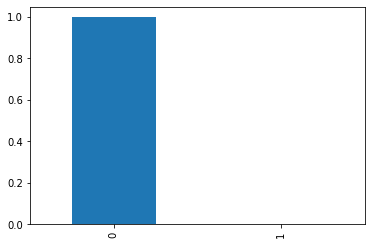

In [18]:
(MyData['Class'].value_counts()/np.float(len(MyData))).plot.bar()

## Misleading accuracy for imbalanced classes
Now, I will demonstrate that accuracy is misleading for imbalanced classes. Most of the machine learning algorithms are designed to maximize the overall accuracy by default. But this maximum accuracy is misleading. We can confirm this with the following analysis.

I will fit a very simple Logistic Regression model using the default settings. I will train the classifier on the imbalanced dataset.

In [19]:
# declare feature vector and target variable

X = MyData.drop(['Class'], axis=1)
y = MyData['Class']
# import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression


# instantiate the Logistic Regression classifier
logreg = LogisticRegression()
# fit the classifier to the imbalanced data
clf = logreg.fit(X, y)

# predict on the training data
y_pred = clf.predict(X)

In [23]:
# lets check the accuracy of our model based of false metrics
from sklearn.metrics import accuracy_score
check_accuray=accuracy_score(y_pred,y)
check_accuray

0.9989185659060346

In [24]:
# import the metric
from sklearn.metrics import classification_report


# print classification report
print("Classification Report:\n\n", classification_report(y, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.68      0.69      0.69       492

    accuracy                           1.00    284807
   macro avg       0.84      0.85      0.84    284807
weighted avg       1.00      1.00      1.00    284807



## 1.Random over-sampling the minority class
Over-sampling is the process of randomly duplicating observations from the minority class in order to achieve a balanced dataset. So, it replicates the observations from minority class to balance the data. It is also known as upsampling. It may result in overfitting due to duplication of data points.

The most common way of over-sampling is to resample with replacement. I will proceed as follows:-

First, I will import the resampling module from Scikit-Learn.

In [41]:
from sklearn.utils import resample
# separate the th minority and the majority
Majority=MyData[MyData['Class']==0]
Minority=MyData[MyData['Class']==1]

# oversampling the minority
Oversample_Minority=resample(Minority,n_samples=284315, replace=True,random_state=0)
Concat_oversampled=pd.concat([Oversample_Minority,Majority])
Concat_oversampled['Class'].value_counts()


1    284315
0    284315
Name: Class, dtype: int64

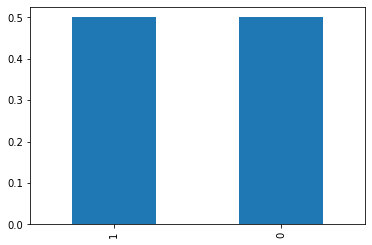

In [37]:
(Concat_oversampled['Class'].value_counts()/np.float(len(Concat_oversampled))).plot.bar()

2.Random under-sampling the minority class

In [38]:
Undersample=resample(Majority,n_samples=492,replace=True,random_state=0)
Concat_undersample=pd.concat([Undersample,Minority])
Concat_undersample['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

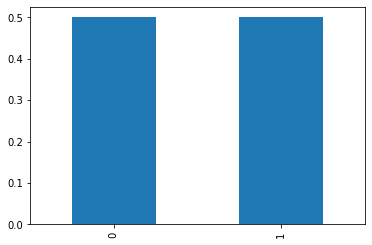

In [31]:
(Concat_undersample['Class'].value_counts()/np.float(len(Concat_undersample))).plot.bar()

### Let's apply some deep learning algorithim to see how the model perfomes.

In [50]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection  import train_test_split
# Declare the X and Y variables
x=Concat_oversampled.drop(['Class'], axis=1)
y=Concat_oversampled['Class']

# split the training and testing data
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)


# 1. Build the model using the sequential API
Model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(100 ,activation='relu')
])

# 2.Compile the model
Model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
Model_1.fit(X_train,y_train ,epochs=5)


Epoch 1/5
14216/14216 [==============================] - 25s 2ms/step - loss: 17.8686 - mae: 17.8686
Epoch 2/5
14216/14216 [==============================] - 25s 2ms/step - loss: 0.5003 - mae: 0.5003
Epoch 3/5
14216/14216 [==============================] - 25s 2ms/step - loss: 0.5003 - mae: 0.5003
Epoch 4/5
14216/14216 [==============================] - 25s 2ms/step - loss: 0.5003 - mae: 0.5003
Epoch 5/5
14216/14216 [==============================] - 25s 2ms/step - loss: 0.5003 - mae: 0.5003


## 3. Random under-sampling and over-sampling with imbalanced-learn.
There is a Python library which enable us to handle the imbalanced datasets. It is called Imbalanced-Learn. It is a Python library which contains various algorithms to handle the imbalanced datasets. It can be easily installed with the pip command. This library contains a make_imbalance method to exasperate the level of class imbalance within a given dataset.

In [54]:
# import imbalanced learn library

import imblearn


In [56]:

# import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
